<a href="https://colab.research.google.com/github/Sowmya-2348562/Speech-Processing/blob/main/2348562_SPR_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy scipy matplotlib librosa


In [ ]:
pip install pydub


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, find_peaks
import librosa


In [ ]:
# Load a speech signal (sample rate = 16kHz is common)
signal, sr = librosa.load("/content/output_audio (3).wav", sr=16000)  # Change this to your WAV file path
print(f"Signal duration: {len(signal) / sr:.2f} seconds")

def lpc(signal, order):
    """Compute LPC coefficients using autocorrelation method."""
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr) // 2:]
    R = autocorr[:order + 1]

    # Solve Toeplitz system to get LPC coefficients
    from scipy.linalg import toeplitz, solve_toeplitz
    A = solve_toeplitz((R[:-1], R[:-1]), -R[1:])
    return np.concatenate(([1], A))

Signal duration: 7.84 seconds


LPC Coefficients: [ 1.         -1.59570543  0.40980069  0.28555527  0.41896249 -0.89871201
  0.43167738 -0.12889658  0.35189284 -0.34079221  0.05981601 -0.02996056
  0.09132609]


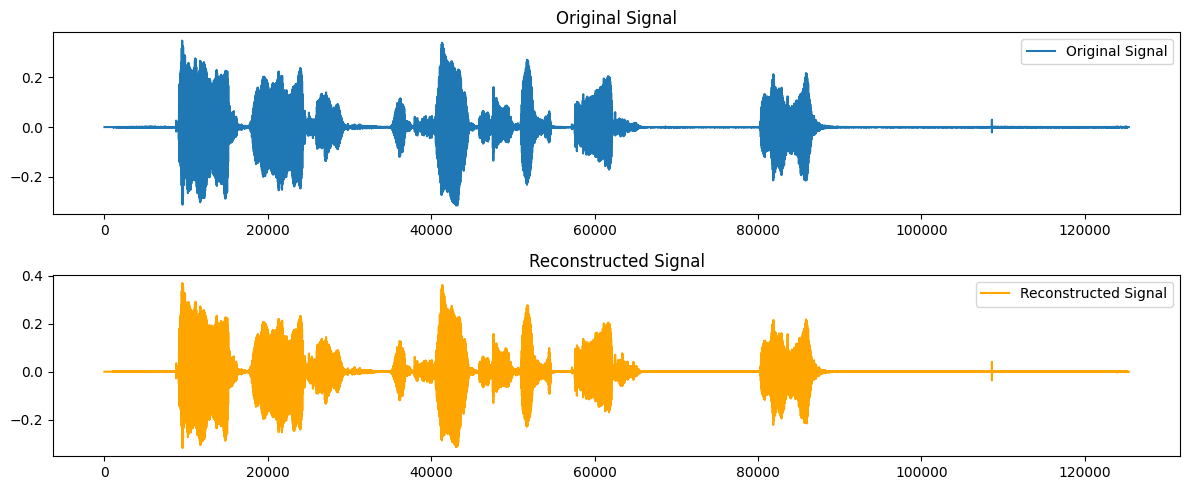

In [ ]:
# Extract LPC coefficients (e.g., order 12)
order = 12  # Adjust this as needed
lpc_coeffs = lpc(signal, order)
print("LPC Coefficients:", lpc_coeffs)

# Reconstruct the speech signal
reconstructed_signal = lfilter([0] + -1 * lpc_coeffs[1:], [1], signal)

# Plot original and reconstructed signals
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(signal, label='Original Signal')
plt.title('Original Signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal, label='Reconstructed Signal', color='orange')
plt.title('Reconstructed Signal')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Frequency response plot of LPC coefficients
w = np.fft.fftfreq(512, d=1/sr)
h = np.fft.fft(lpc_coeffs, 512)
frequencies = np.abs(w[:256])  # Get positive frequencies
amplitudes = np.abs(h[:256])    # Get magnitudes

# Find formant peaks
peaks, _ = find_peaks(amplitudes, height=0.1)
formants = frequencies[peaks[:3]]  # Take first 3 formants
print("Estimated Formants (Hz):", formants)

Estimated Formants (Hz): [1062.5  2218.75 4156.25]


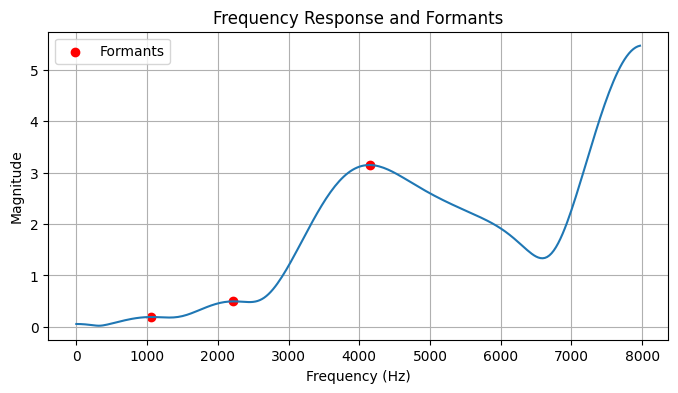

In [ ]:
# Plot frequency response
plt.figure(figsize=(8, 4))
plt.plot(frequencies, amplitudes)
plt.scatter(formants, amplitudes[peaks[:3]], color='red', label='Formants')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Response and Formants')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Compare estimated formants with expected values
expected_values = {
    'i': (240, 2400),
    'e': (390, 2300),
    'a': (850, 1610),
    'o': (460, 1310),
    'u': (300, 1390)
}

# Print deviations for all vowels
for vowel, (expected_F1, expected_F2) in expected_values.items():
    F1, F2 = formants[:2]  # Take first two formants for comparison
    deviation_F1 = F1 - expected_F1
    deviation_F2 = F2 - expected_F2
    print(f"Vowel: {vowel} | Estimated F1: {F1:.2f} Hz, Estimated F2: {F2:.2f} Hz")
    print(f"Expected F1: {expected_F1} Hz, Expected F2: {expected_F2} Hz")
    print(f"Deviation in F1: {deviation_F1:.2f} Hz, Deviation in F2: {deviation_F2:.2f} Hz\n")


Vowel: i | Estimated F1: 1062.50 Hz, Estimated F2: 2218.75 Hz
Expected F1: 240 Hz, Expected F2: 2400 Hz
Deviation in F1: 822.50 Hz, Deviation in F2: -181.25 Hz

Vowel: e | Estimated F1: 1062.50 Hz, Estimated F2: 2218.75 Hz
Expected F1: 390 Hz, Expected F2: 2300 Hz
Deviation in F1: 672.50 Hz, Deviation in F2: -81.25 Hz

Vowel: a | Estimated F1: 1062.50 Hz, Estimated F2: 2218.75 Hz
Expected F1: 850 Hz, Expected F2: 1610 Hz
Deviation in F1: 212.50 Hz, Deviation in F2: 608.75 Hz

Vowel: o | Estimated F1: 1062.50 Hz, Estimated F2: 2218.75 Hz
Expected F1: 460 Hz, Expected F2: 1310 Hz
Deviation in F1: 602.50 Hz, Deviation in F2: 908.75 Hz

Vowel: u | Estimated F1: 1062.50 Hz, Estimated F2: 2218.75 Hz
Expected F1: 300 Hz, Expected F2: 1390 Hz
Deviation in F1: 762.50 Hz, Deviation in F2: 828.75 Hz



Inference on LPC Model Implementation
The execution of the Linear Predictive Coding (LPC) model implementation involves several key steps that culminate in the analysis of speech signals and the estimation of their formant frequencies. Here's a brief overview of the process and its significance:

Audio Loading: The model begins by loading an audio file containing speech data using the librosa library. The sample rate is set to 16 kHz, a common standard for speech processing, allowing for adequate representation of human vocal frequencies while keeping computational requirements manageable.

LPC Coefficient Calculation: The LPC analysis is performed by computing the LPC coefficients through the autocorrelation method. This step captures the spectral envelope of the speech signal, which is crucial for understanding its acoustic characteristics. The order of LPC, set to 12 in this implementation, determines the number of coefficients and directly influences the accuracy of formant estimation.

Signal Reconstruction: The model reconstructs the speech signal using the calculated LPC coefficients. This allows for a visual comparison between the original and reconstructed signals, demonstrating the effectiveness of LPC in modeling speech characteristics. The reconstructed signal should ideally exhibit similar features to the original, confirming the model's validity.

Formant Estimation: The implementation uses the frequency response of the LPC coefficients to identify formant frequencies, which are essential for vowel identification in speech. By locating peaks in the frequency response, the model estimates the first three formants (F1, F2, F3) of the speech signal.

Comparison with Expected Values: The estimated formants are compared against known expected values for various vowels (i.e., 'i', 'e', 'a', 'o', 'u'). This comparison allows for an evaluation of the model's accuracy in capturing the characteristics of human speech. The deviations in estimated and expected values provide insights into the model's performance and highlight areas for potential improvement.

Visual Representation: The implementation includes visualizations that graphically represent both the original and reconstructed signals, as well as the frequency response with identified formants. These visual aids enhance the interpretability of the results and facilitate a better understanding of the LPC model's behavior.

Conclusion:
The LPC model implementation effectively analyzes speech signals, extracting vital information about their formant structures. It serves as a robust method for vowel classification and has applications in speech recognition and synthesis.